# **Modules**

In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from keras.utils import np_utils
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
# example of loading an image with the Keras API
from tensorflow.keras.utils import load_img
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import MaxPooling2D, Rescaling

# **Load dataset**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [4]:
!unzip  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip 

Archive:  /content/drive/MyDrive/OCR-DATASET-PROF/DL-OCR-Arabic-main.zip
fe829d254cd85cf845897b9c1f631a7751c6e1c4
   creating: DL-OCR-Arabic-main/
  inflating: DL-OCR-Arabic-main/.gitignore  
  inflating: DL-OCR-Arabic-main/LICENSE  
  inflating: DL-OCR-Arabic-main/README.md  
   creating: DL-OCR-Arabic-main/datatset/
  inflating: DL-OCR-Arabic-main/datatset/.DS_Store  
   creating: DL-OCR-Arabic-main/datatset/abed/
  inflating: DL-OCR-Arabic-main/datatset/abed/abed001.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed002.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed003.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed004.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed005.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed006.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed007.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed008.tif  
  inflating: DL-OCR-Arabic-main/datatset/abed/abed009.tif  
  inflating: DL-OCR-Arabic-main/datatset

# Exemples du dataset

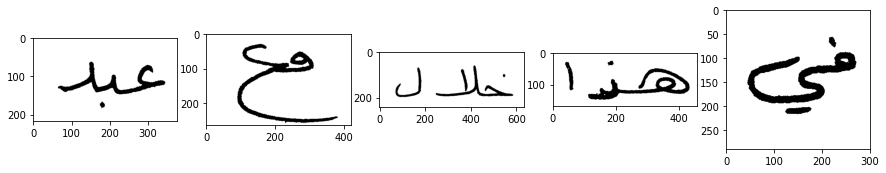

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))

img =  load_img('/content/DL-OCR-Arabic-main/datatset/abed/abed001.tif')
img2 =  load_img('/content/DL-OCR-Arabic-main/datatset/ma/ma006.tif')
img3 =  load_img('/content/DL-OCR-Arabic-main/datatset/khelal/khelal001.tif')
img4 =  load_img('/content/DL-OCR-Arabic-main/datatset/hatha/hatha006.tif')
img5 = load_img('/content/DL-OCR-Arabic-main/datatset/in/in021.tif')
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)
ax[4].imshow(img5)

# Building dataset

In [24]:
dataset_images  = []
dataset_labels = []
directory ='/content/DL-OCR-Arabic-main/datatset/abed'
rootdir = '/content/DL-OCR-Arabic-main/datatset'
shape = (200,200)
for subdir, dirs, files in os.walk(rootdir):
 
  for file in files:
    if file.split('.')[1] == 'tif':

      img = cv2.imread(os.path.join(subdir, file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img = cv2.resize(img,shape)
      dataset_images.append(img)
      dataset_labels.append(os.path.basename(subdir))


df = pd.DataFrame()
df['images'] = dataset_images
df['labels'] = dataset_labels
labels = dataset_labels
train_labels = pd.get_dummies(labels ).values
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)

print(df)


                                                 images labels
0     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
1     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
2     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
3     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
4     [[255, 255, 255, 255, 255, 255, 255, 255, 255,...    hya
...                                                 ...    ...
1903  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   mohd
1904  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   mohd
1905  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   mohd
1906  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   mohd
1907  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...   mohd

[1908 rows x 2 columns]


In [25]:
unique_labels = list(OrderedDict.fromkeys(labels))
df_labels = pd.DataFrame()
df_labels['labels'] = df['labels']
labelencoder = LabelEncoder()
df_labels['labels_cat'] = labelencoder.fit_transform(df_labels['labels'] )
new_y = np.array(df_labels['labels_cat'] )

unique_labels_num = np.array(df_labels['labels_cat'].drop_duplicates())
print(df_labels)
print(new_y)
print(unique_labels_num)
print(unique_labels)

dict_lab =dict()
for i in range(0,len(unique_labels_num)):
  dict_lab[unique_labels_num[i]] = unique_labels[i]

print(dict_lab)

     labels  labels_cat
0       hya          15
1       hya          15
2       hya          15
3       hya          15
4       hya          15
...     ...         ...
1903   mohd          23
1904   mohd          23
1905   mohd          23
1906   mohd          23
1907   mohd          23

[1908 rows x 2 columns]
[15 15 15 ... 23 23 23]
[15 10  2  4  8 27 20  7  5  3 17  0 21 26 18 22  9 14 16  1 24  6 13 12
 25 19 11 23]
['hya', 'en', 'alaam', 'althy', 'aw', 'ykon', 'ma', 'an', 'alty', 'allah', 'kan', 'abed', 'maa', 'tm', 'khelal', 'mn', 'ela', 'hwa', 'in', 'ala', 'qabel', 'alyom', 'hnak', 'hathih', 'qd', 'kma', 'hatha', 'mohd']
{15: 'hya', 10: 'en', 2: 'alaam', 4: 'althy', 8: 'aw', 27: 'ykon', 20: 'ma', 7: 'an', 5: 'alty', 3: 'allah', 17: 'kan', 0: 'abed', 21: 'maa', 26: 'tm', 18: 'khelal', 22: 'mn', 9: 'ela', 14: 'hwa', 16: 'in', 1: 'ala', 24: 'qabel', 6: 'alyom', 13: 'hnak', 12: 'hathih', 25: 'qd', 19: 'kma', 11: 'hatha', 23: 'mohd'}


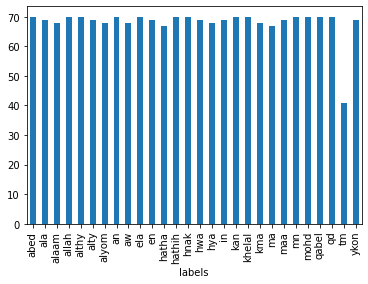

In [26]:
df2 = df.groupby(['labels'])['labels'].count().plot(kind='bar')

hya


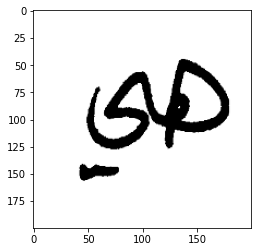

In [27]:
plt.imshow(dataset_images[0], cmap='Greys_r')
print(dataset_labels[0])

In [28]:
df['labels']

0        hya
1        hya
2        hya
3        hya
4        hya
        ... 
1903    mohd
1904    mohd
1905    mohd
1906    mohd
1907    mohd
Name: labels, Length: 1908, dtype: object

**Reshape data for layer input**

In [29]:
print(dataset_images[80].shape)

(200, 200)


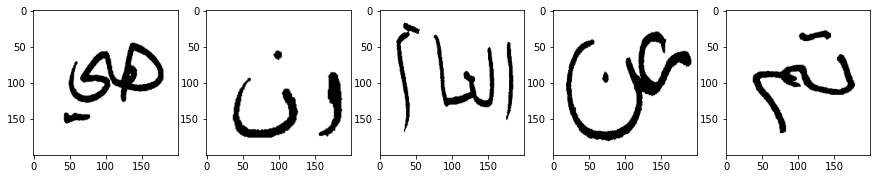

In [30]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
ax[0].imshow(dataset_images[0], cmap='Greys_r')
ax[1].imshow(dataset_images[70], cmap='Greys_r')
ax[2].imshow(dataset_images[170], cmap='Greys_r')
ax[3].imshow(dataset_images[500], cmap='Greys_r')
ax[4].imshow(dataset_images[900], cmap='Greys_r')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dataset_images, train_labels,test_size=0.2, random_state=42)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


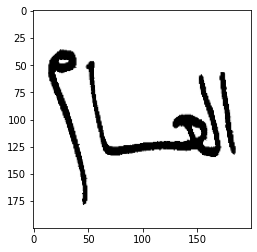

In [32]:
plt.imshow(X_train[0], cmap='Greys_r')
print(y_train[0])

label to text 

# **Building model**

# **MODEL 1 NO DATAGN**

In [33]:
X_train.shape

(1526, 200, 200)

In [34]:
y_train.shape

(1526, 28)

In [64]:
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


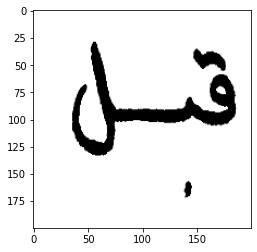

In [37]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])


In [38]:
y_train.shape

(1526, 28)

Reshape labels

In [65]:
history = model.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 126s 4s/step - loss: 53.7068 - accuracy: 0.1402 - val_loss: 53.2088 - val_accuracy: 0.0550
Epoch 2/40
31/31 [==============================] - 121s 4s/step - loss: 46.6473 - accuracy: 0.3119 - val_loss: 45.7922 - val_accuracy: 0.1178
Epoch 3/40
31/31 [==============================] - 124s 4s/step - loss: 38.9506 - accuracy: 0.4862 - val_loss: 36.1994 - val_accuracy: 0.2461
Epoch 4/40
31/31 [==============================] - 120s 4s/step - loss: 31.6371 - accuracy: 0.6101 - val_loss: 28.6987 - val_accuracy: 0.5942
Epoch 5/40
31/31 [==============================] - 124s 4s/step - loss: 25.3142 - accuracy: 0.7071 - val_loss: 23.2605 - val_accuracy: 0.5288
Epoch 6/40
31/31 [==============================] - 123s 4s/step - loss: 20.0392 - accuracy: 0.7910 - val_loss: 18.3068 - val_accuracy: 0.7147
Epoch 7/40
31/31 [==============================] - 120s 4s/step - loss: 15.8885 - accuracy: 0.8309 - val_loss: 15.8808 - val_accuracy: 0.3377

In [66]:
# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 batch_normalization_15 (Bat  (None, 200, 200, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 batch_normalization_16 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                      

In [67]:
y_pred = model.predict(X_test)

12/12 [==============================] - 7s 570ms/step


In [68]:
y_true = y_test

In [69]:
X_test.shape

(382, 200, 200)

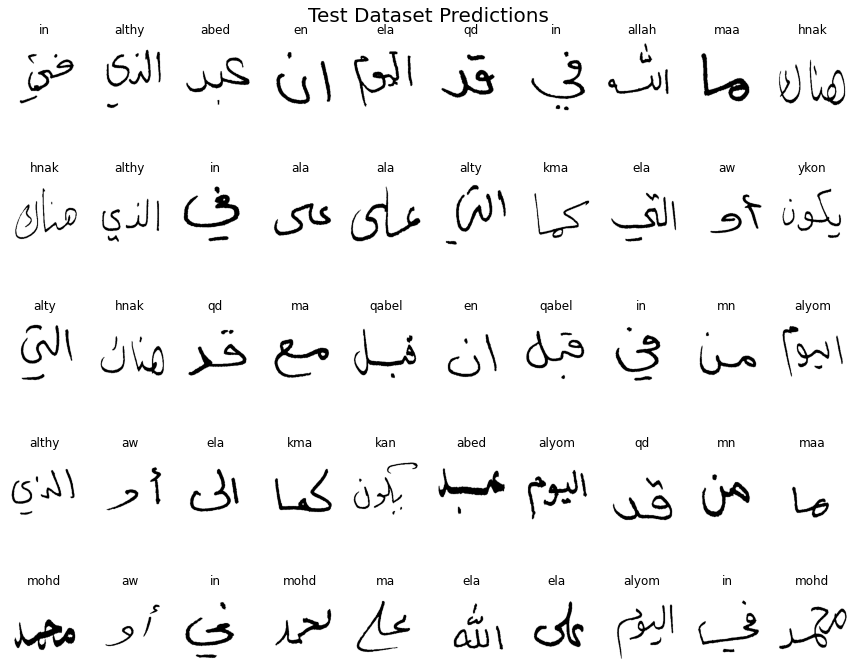

In [71]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx], cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [72]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

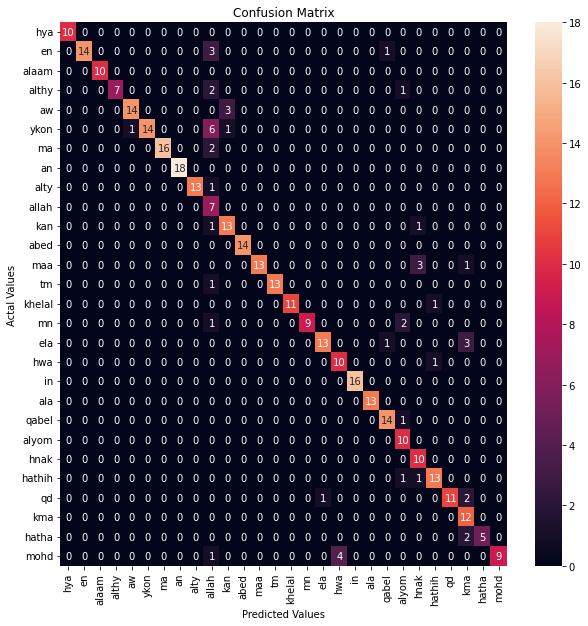

In [73]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [74]:
log_loss(y_test, y_pred)

0.44058273703516465

In [75]:
#good score is >8 
cohen_kappa_score(y_testm, y_predm)

0.8641912982885259

In [76]:
# Generate class membership probabilities
#good roc auc >8
roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

0.9981402661172993

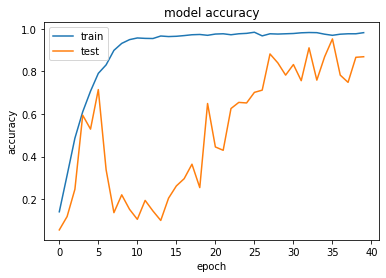

In [77]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

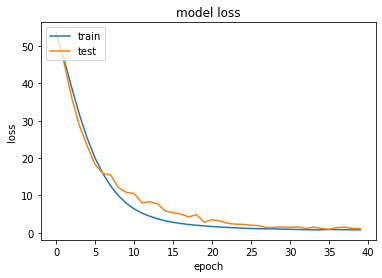

In [78]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = qabel  pred = qabel
real = en  pred = en
real = mohd  pred = mohd
real = khelal  pred = khelal
real = ma  pred = ma
real = hatha  pred = hatha
real = en  pred = en
real = an  pred = an
real = alty  pred = ela
real = mn  pred = mn
real = qabel  pred = qabel
real = khelal  pred = khelal
real = ela  pred = ela
real = en  pred = mn
real = ykon  pred = kan
real = mohd  pred = mohd
real = hwa  pred = mohd
real = kan  pred = mohd
real = ykon  pred = ykon
real = ala  pred = ela
real = aw  pred = aw
real = maa  pred = maa
real = hwa  pred = hwa
real = in  pred = in
real = althy  pred = althy
real = abed  pred = abed
real = en  pred = en
real = alyom  pred = ela
real = qd  pred = qd
real = in  pred = in
real = allah  pred = allah
real = maa  pred = maa
real = hnak  pred = hnak
real = hnak  pred = hnak
real = althy  pred = althy
real = in  pred = in
real = ala  pred = ala
real = ala  pred = ala
real = alty  pred = alty
real = kma  pred = kma
real = alty  pred = ela
real = aw  pred = aw
rea

In [80]:
model.save('./models/vgg_model.h5') 

In [81]:
!mv /content/models/vgg_model.h5 /content/drive/MyDrive/OCR-DATASET-PROF

# **MODEL 1 NO DATAGN**

In [82]:
X_train.shape

(1526, 200, 200)

In [83]:
y_train.shape

(1526, 28)

In [84]:
model2 = Sequential()
model2.add(Conv2D(filters= 16, kernel_size = (3,3), input_shape=(200, 200, 1), padding= 'same', activation="tanh"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=96, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=96, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Conv2D(filters=96, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(Conv2D(filters=96, kernel_size=(3,3), activation='tanh', padding="same",kernel_regularizer =tf.keras.regularizers.l2( l=0.01))) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(4096, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(512, activation='tanh', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(28, activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Nadam(epsilon=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
y_train.shape

(1526, 28)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


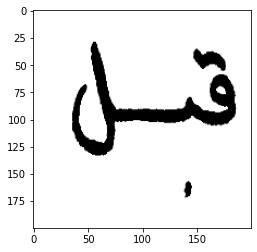

In [86]:
plt.imshow(X_test[10], cmap='Greys_r')
print(y_test[10])


In [87]:
y_train.shape

(1526, 28)

Reshape labels

In [88]:
history = model2.fit(X_train,y_train,epochs=40,batch_size=50,validation_data=(X_test,y_test))

Epoch 1/40
31/31 [==============================] - 132s 4s/step - loss: 48.5744 - accuracy: 0.0872 - val_loss: 42.6049 - val_accuracy: 0.0340
Epoch 2/40
31/31 [==============================] - 131s 4s/step - loss: 32.1913 - accuracy: 0.2156 - val_loss: 29.6671 - val_accuracy: 0.0393
Epoch 3/40
31/31 [==============================] - 127s 4s/step - loss: 21.5300 - accuracy: 0.3368 - val_loss: 21.3862 - val_accuracy: 0.0524
Epoch 4/40
31/31 [==============================] - 128s 4s/step - loss: 15.4059 - accuracy: 0.4161 - val_loss: 14.1097 - val_accuracy: 0.2618
Epoch 5/40
31/31 [==============================] - 129s 4s/step - loss: 12.1587 - accuracy: 0.4181 - val_loss: 13.6151 - val_accuracy: 0.1126
Epoch 6/40
31/31 [==============================] - 127s 4s/step - loss: 9.2867 - accuracy: 0.5990 - val_loss: 10.4126 - val_accuracy: 0.1832
Epoch 7/40
31/31 [==============================] - 127s 4s/step - loss: 7.4502 - accuracy: 0.6907 - val_loss: 8.2734 - val_accuracy: 0.3796
Ep

In [89]:
# Model Summary
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 200, 200, 16)      160       
                                                                 
 batch_normalization_20 (Bat  (None, 200, 200, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 batch_normalization_21 (Bat  (None, 100, 100, 32)     128       
 chNormalization)                                                
                                                      

In [104]:
y_pred = model2.predict(X_test)

12/12 [==============================] - 8s 632ms/step


In [105]:
y_true = y_test

In [106]:
X_test.shape

(382, 200, 200)

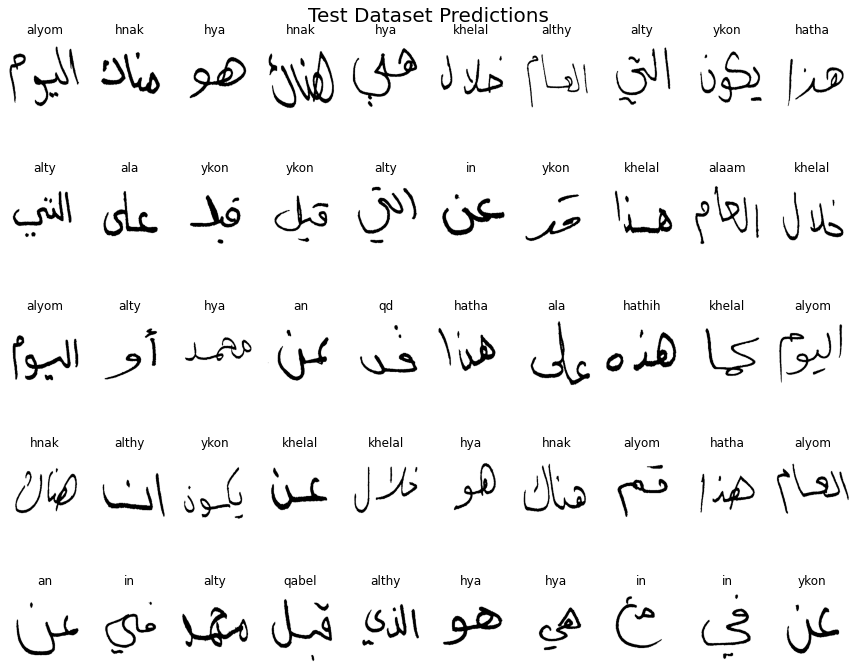

In [107]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(12, 10))
idx =  random.randrange(0,370)

for i in range(5):
    for j in range(10):
        predicted_label = dict_lab[np.argmax(y_pred[idx])]
      
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(X_test[idx], cmap='Greys_r')
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [108]:
y_predm=np.argmax(y_pred, axis=1)
y_testm=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testm, y_predm)

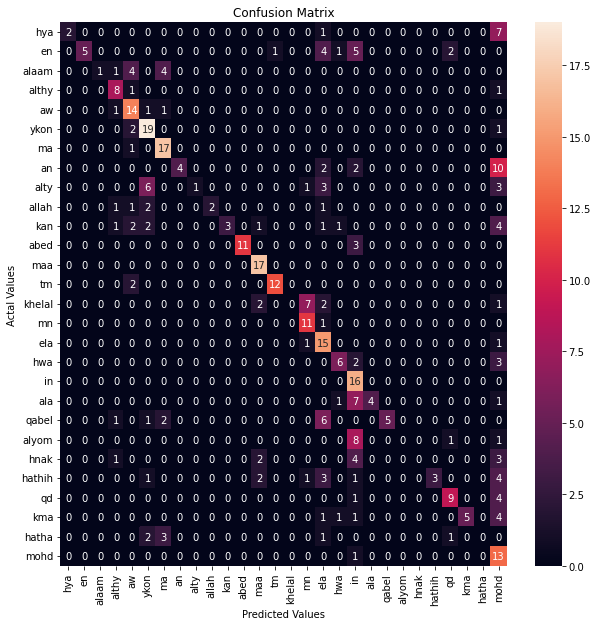

In [109]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

cm_df = pd.DataFrame(cm,
                     index = unique_labels, 
                     columns = unique_labels)

plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [110]:
log_loss(y_test, y_pred)

1.892017453026358

In [111]:
#good score is >8 
cohen_kappa_score(y_testm, y_predm)

0.5113728124397059

In [112]:
# Generate class membership probabilities
#good roc auc >8
roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")

0.9800543580671086

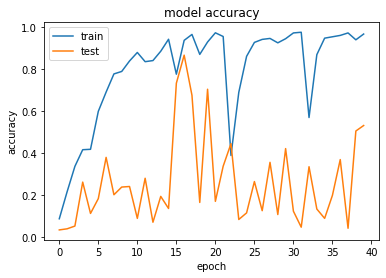

In [113]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

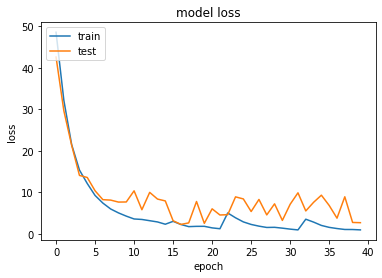

In [114]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [115]:
for i in range( 0,200):
  print('real = {}'.format(dict_lab[np.where(y_true[i] == 1) [0][0] ]+'  pred = {}'.format(dict_lab[np.argmax(y_pred[i])])))

real = qabel  pred = qabel
real = en  pred = allah
real = mohd  pred = ykon
real = khelal  pred = khelal
real = ma  pred = ma
real = hatha  pred = hatha
real = en  pred = ykon
real = an  pred = an
real = alty  pred = alty
real = mn  pred = khelal
real = qabel  pred = qabel
real = khelal  pred = khelal
real = ela  pred = alty
real = en  pred = in
real = ykon  pred = khelal
real = mohd  pred = mohd
real = hwa  pred = hya
real = kan  pred = khelal
real = ykon  pred = ykon
real = ala  pred = hnak
real = aw  pred = in
real = maa  pred = khelal
real = hwa  pred = hathih
real = in  pred = in
real = althy  pred = alty
real = abed  pred = ykon
real = en  pred = en
real = alyom  pred = alyom
real = qd  pred = qd
real = in  pred = in
real = allah  pred = allah
real = maa  pred = khelal
real = hnak  pred = hnak
real = hnak  pred = hnak
real = althy  pred = althy
real = in  pred = in
real = ala  pred = in
real = ala  pred = ala
real = alty  pred = alty
real = kma  pred = khelal
real = alty  pred = 

In [116]:
model2.save('./models/vgg_model_2.h5') 

In [117]:
!mv /content/models/vgg_model_2.h5 /content/drive/MyDrive/OCR-DATASET-PROF